In [605]:
from importlib import reload  # Python 3.4+
import simtoolkit.simtoolkit as sim
sim = reload(sim)
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 9) #if your plots turn out too large or small, adjust this


In [606]:
larmor_frequency = 64.0e6 #Hz
offset_frequency = 4.7e-6 * larmor_frequency
stdev_offset = 0.9e-6 * larmor_frequency
stdev_larmor = 0.2e-6 #ppm

In [607]:
v = sim.Vector(3,1,1)
v.negative()
v = v.negative()
print(f"{v.toString()}")

s = sim.Spin(larmor_frequency, 1.0)
s.rotatex(np.deg2rad(180))
print(f"{s.toString()}")
for i in range(10):
    s.relax(10)
    print(f"{s.toString()}")


(-3, -1, -1)
Frequency = 64000000.0, vector = (0.0, -1.2246467991473532e-16, -1.0), magnitude = 1.0
Frequency = 64000000.0, vector = (0.0, -1.2001538631644062e-16, -0.96), magnitude = 1.0
Frequency = 64000000.0, vector = (0.0, -1.176150785901118e-16, -0.9208), magnitude = 1.0
Frequency = 64000000.0, vector = (0.0, -1.1526277701830957e-16, -0.882384), magnitude = 1.0
Frequency = 64000000.0, vector = (0.0, -1.1295752147794337e-16, -0.84473632), magnitude = 1.0
Frequency = 64000000.0, vector = (0.0, -1.1069837104838451e-16, -0.8078415936), magnitude = 1.0
Frequency = 64000000.0, vector = (0.0, -1.0848440362741682e-16, -0.7716847617279999), magnitude = 1.0
Frequency = 64000000.0, vector = (0.0, -1.0631471555486849e-16, -0.73625106649344), magnitude = 1.0
Frequency = 64000000.0, vector = (0.0, -1.0418842124377112e-16, -0.7015260451635712), magnitude = 1.0
Frequency = 64000000.0, vector = (0.0, -1.0210465281889569e-16, -0.6674955242602998), magnitude = 1.0
Frequency = 64000000.0, vector = (0

In [608]:
number_spins = 1000
timepoints = range(0,400,2)
base_relaxation = 0.0005

spins = sim.Spinensemble(number_spins, offset_frequency, stdev_offset)
spins.set_relaxation(base_relaxation)

In [609]:
pulseSequence = sim.PulseSequence()
pulseSequence.add(sim.Pulse("x-pulse", 50, 70))
pulseSequence.add(sim.Pulse("x-pulse", 100, 70))
#pulseSequence.add(sim.Pulse("x-pulse", 300, 70))
# pulseSequence.add(sim.Pulse("x-pulse", 50, 90))
# pulseSequence.add(sim.Pulse("invert", 100, None))
# pulseSequence.add(sim.Pulse("invert", 300, None))

signal_list = pulseSequence.simulate(spins, timepoints)

  0%|          | 0/199 [00:00<?, ?it/s]

100%|██████████| 199/199 [00:05<00:00, 38.82it/s]


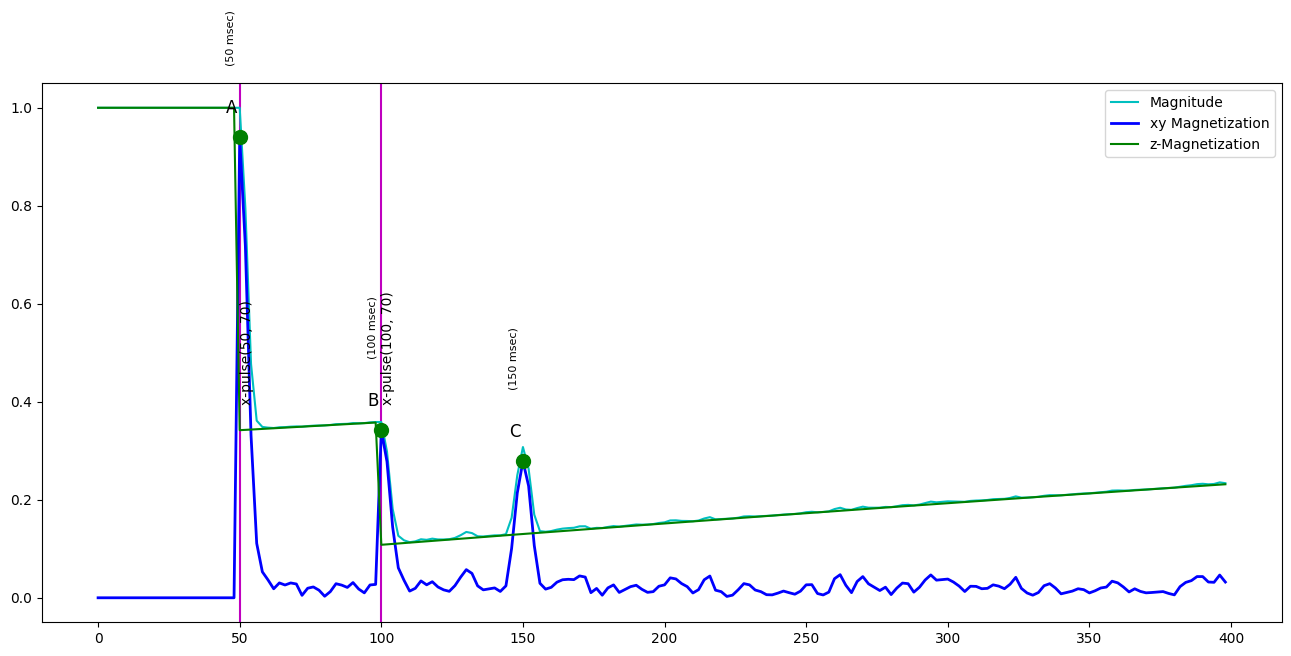

In [610]:
plt.rcParams["figure.figsize"] = (16, 7) #if your plots turn out too large or small, adjust this
pulseSequence.plotWithSignal(signal_list)
#pulseSequence.load(signal_list)
pulseSequence.determineHeightOfExpectedPeaks()
pulseSequence.showPeakLabels()
# print(pulseSequence.expected_peaks)

In [611]:
number_spins = 1000
timepoints_longTR_longTE = range(0,8000,12)
timepoints_shortTR_shortTE = range(0,800,2)
base_relaxation = 0.0005

spins_long_T1_T2 = sim.Spinensemble(number_spins, offset_frequency, stdev_offset)
spins_long_T1_T2.set_relaxation(base_relaxation)

TR_factor = 12.0
TE_factor = 3.0
spins_short_T1_T2 = sim.Spinensemble(number_spins, offset_frequency, stdev_offset*TE_factor)
spins_short_T1_T2.set_relaxation(base_relaxation*TR_factor)

In [612]:
pulseSequence_longTR_longTE = sim.PulseSequence()
pulseSequence_longTR_longTE.add(sim.Pulse("x-pulse", 10, 90))
pulseSequence_longTR_longTE.add(sim.Pulse("x-pulse", 410, 180)) #echo expected at 810
pulseSequence_longTR_longTE.add(sim.Pulse("crusher", 1800, 19159)) #crusher gradient
pulseSequence_longTR_longTE.setTR(2000)
signalList_long_T1_T2_longTR_longTE = pulseSequence_longTR_longTE.simulate(spins_long_T1_T2, timepoints_longTR_longTE)
signalList_short_T1_T2_longTR_longTE = pulseSequence_longTR_longTE.simulate(spins_short_T1_T2, timepoints_longTR_longTE)

  0%|          | 0/666 [00:00<?, ?it/s]

100%|██████████| 666/666 [00:18<00:00, 35.75it/s]


In [613]:
pulseSequence_shortTR_shortTE = sim.PulseSequence()
pulseSequence_shortTR_shortTE.add(sim.Pulse("x-pulse", 10, 90))
pulseSequence_shortTR_shortTE.add(sim.Pulse("x-pulse", 50, 180)) #echo expected at 90
pulseSequence_shortTR_shortTE.add(sim.Pulse("crusher", 120, 19159)) #crusher gradient
pulseSequence_shortTR_shortTE.setTR(140)
signalList_long_T1_T2_shortTR_shortTE = pulseSequence_shortTR_shortTE.simulate(spins_long_T1_T2, timepoints_shortTR_shortTE)
signalList_short_T1_shortTR_shortTE = pulseSequence_shortTR_shortTE.simulate(spins_short_T1_T2, timepoints_shortTR_shortTE)

  0%|          | 0/399 [00:00<?, ?it/s]

100%|██████████| 399/399 [00:11<00:00, 34.26it/s]


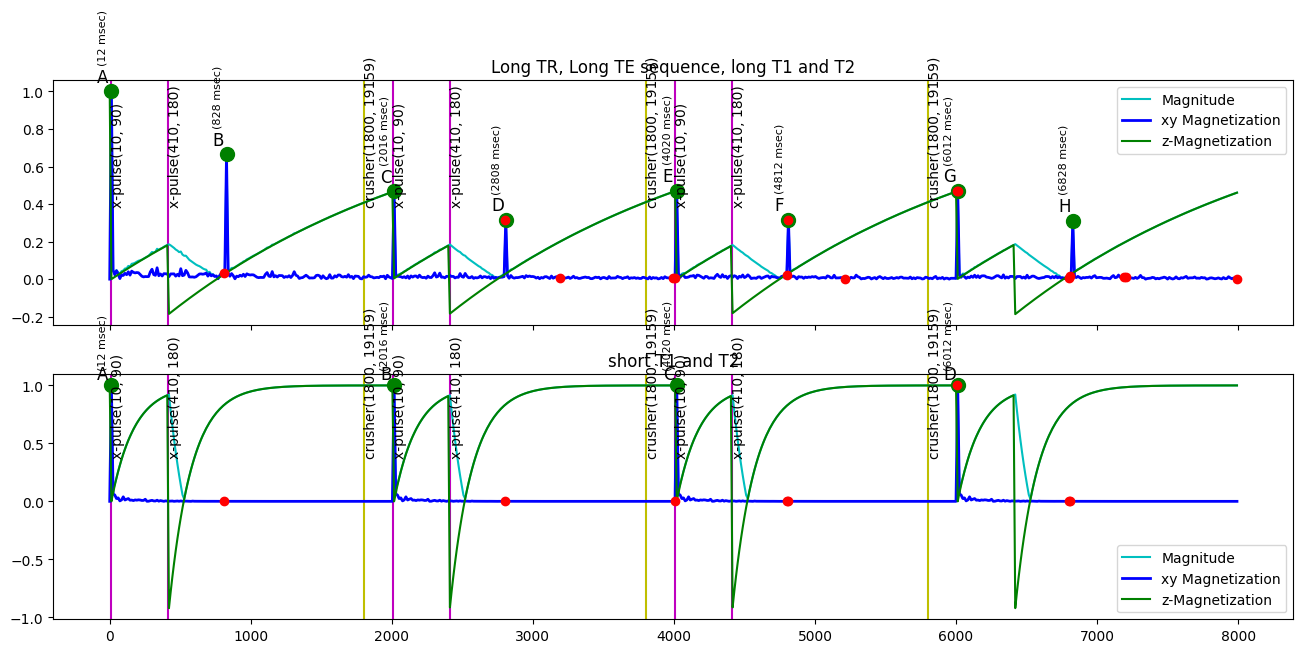

In [614]:
plt.rcParams["figure.figsize"] = (16, 7) #if your plots turn out too large or small, adjust this

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.set_title('Long TR, Long TE sequence, long T1 and T2')
ax2.set_title('short T1 and T2')

pulseSequence_longTR_longTE.setAx(ax1)
pulseSequence_longTR_longTE.plotWithSignal(signalList_long_T1_T2_longTR_longTE)
pulseSequence_longTR_longTE.load(signalList_long_T1_T2_longTR_longTE)
pulseSequence_longTR_longTE.determineHeightOfExpectedPeaks()
pulseSequence_longTR_longTE.showPeakLabels()
pulseSequence_longTR_longTE.showExpectedPeaks(text = False)

pulseSequence_longTR_longTE.setAx(ax2)
pulseSequence_longTR_longTE.plotWithSignal(signalList_short_T1_T2_longTR_longTE)
pulseSequence_longTR_longTE.load(signalList_short_T1_T2_longTR_longTE)
pulseSequence_longTR_longTE.determineHeightOfExpectedPeaks()
pulseSequence_longTR_longTE.showPeakLabels()
pulseSequence_longTR_longTE.showExpectedPeaks(text = False)


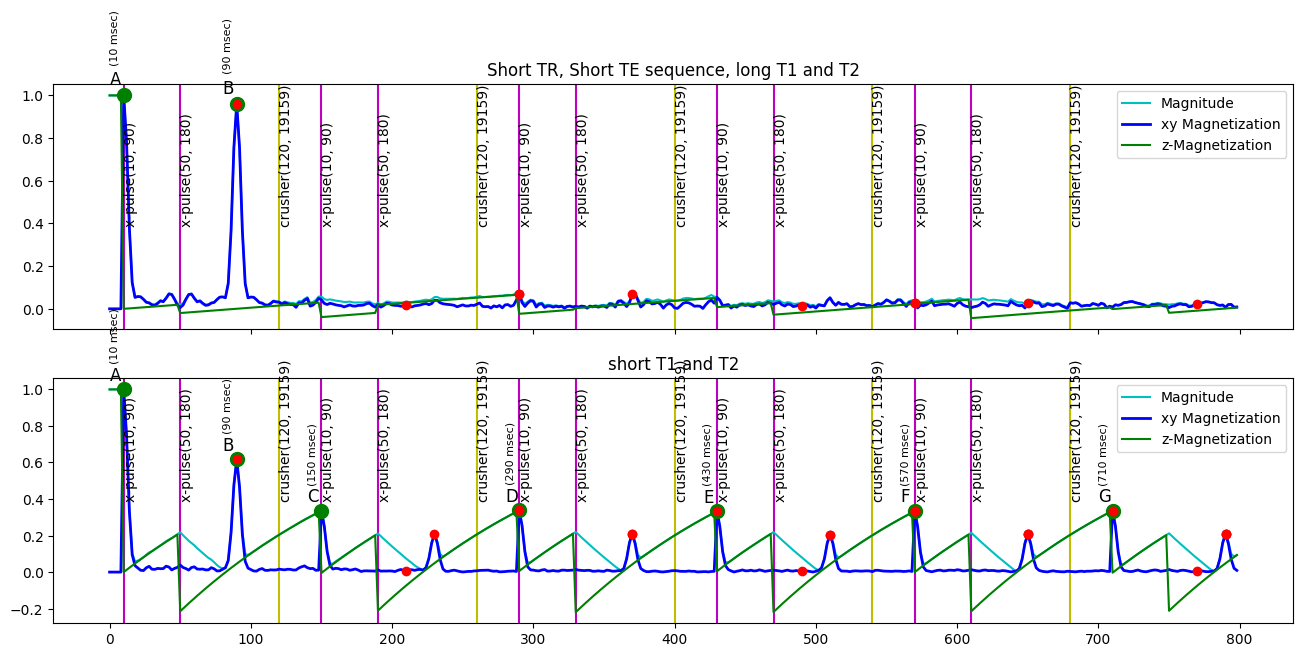

In [615]:
plt.rcParams["figure.figsize"] = (16, 7) #if your plots turn out too large or small, adjust this

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.set_title('Short TR, Short TE sequence, long T1 and T2')
ax2.set_title('short T1 and T2')

pulseSequence_shortTR_shortTE.setAx(ax1)
pulseSequence_shortTR_shortTE.plotWithSignal(signalList_long_T1_T2_shortTR_shortTE)
pulseSequence_shortTR_shortTE.load(signalList_long_T1_T2_shortTR_shortTE)
pulseSequence_shortTR_shortTE.determineHeightOfExpectedPeaks()
pulseSequence_shortTR_shortTE.showPeakLabels()
pulseSequence_shortTR_shortTE.showExpectedPeaks(text = False)

pulseSequence_shortTR_shortTE.setAx(ax2)
pulseSequence_shortTR_shortTE.plotWithSignal(signalList_short_T1_shortTR_shortTE)
pulseSequence_shortTR_shortTE.load(signalList_short_T1_shortTR_shortTE)
pulseSequence_shortTR_shortTE.determineHeightOfExpectedPeaks()
pulseSequence_shortTR_shortTE.showPeakLabels()
pulseSequence_shortTR_shortTE.showExpectedPeaks(text = False)


In [616]:
signalList_short_T1_shortTR_shortTE
signalList_long_T1_T2_shortTR_shortTE


[range(0, 800, 2),
 [[1.0, 0.0, 1.0],
  [1.0, 0.0, 1.0],
  [1.0, 0.0, 1.0],
  [1.0, 0.0, 1.0],
  [1.0, 0.0, 1.0],
  [1.0, 1.0, 6.123233995736759e-17],
  [0.7849558906743387, 0.7849552536956131, 0.0010000000000000846],
  [0.38038549082952816, 0.3803802382256747, 0.0019990000000000806],
  [0.12334283272601873, 0.12330641658034117, 0.0029970010000001006],
  [0.053728353197659055, 0.05357969642866944, 0.003994003998999961],
  [0.05772195669439291, 0.057505861308906246, 0.004990009995001005],
  [0.05655414931006244, 0.05623656586211425, 0.005985019985006163],
  [0.04492909465102939, 0.04438374271192291, 0.006979034965021153],
  [0.031559445994132365, 0.030535961679708352, 0.007972055930055956],
  [0.029004646585891608, 0.027584682776318217, 0.008964083874126049],
  [0.021195974698563002, 0.018712694444784177, 0.009955119790251963],
  [0.019709061222492278, 0.0163905602286324, 0.010945164670461683],
  [0.02799259529915063, 0.025321133394254295, 0.011934219505791313],
  [0.03935256384760418, 